In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime



In [50]:
# Path to the dataset 
cta_ridership_path = "resource/CTA_-_Ridership_-__L__Station_Entries_-_Monthly_Day-Type_Averages___Totals (1).csv"

# Load the dataset into a DataFrame
cta_ridership_df = pd.read_csv(cta_ridership_path)

print(cta_ridership_df.head())




   station_id stationame month_beginning  avg_weekday_rides  \
0       40900     Howard      01/01/2001             6233.9   
1       41190     Jarvis      01/01/2001             1489.1   
2       40100      Morse      01/01/2001             4412.5   
3       41300     Loyola      01/01/2001             4664.5   
4       40760  Granville      01/01/2001             3109.8   

   avg_saturday_rides  avg_sunday-holiday_rides  monthtotal  
0              3814.5                    2408.6      164447  
1              1054.0                     718.0       40567  
2              3064.5                    2087.8      119772  
3              3156.0                    1952.8      125008  
4              2126.0                    1453.8       84189  


## CLEANING -ANALYSIS - VISUALAZATION DATA

In [51]:
# Check for missing values


print(cta_ridership_df.isnull().sum())

station_id                  0
stationame                  0
month_beginning             0
avg_weekday_rides           0
avg_saturday_rides          0
avg_sunday-holiday_rides    0
monthtotal                  0
dtype: int64


In [52]:
cta_ridership_df["month_beginning"] = pd.to_datetime(cta_ridership_df["month_beginning"])
cta_ridership_df.head()

,station_id,stationame,month_beginning,avg_weekday_rides,avg_saturday_rides,avg_sunday-holiday_rides,monthtotal
0,40900,Howard,2001-01-01,6233.9,3814.5,2408.6,164447
1,41190,Jarvis,2001-01-01,1489.1,1054.0,718.0,40567
2,40100,Morse,2001-01-01,4412.5,3064.5,2087.8,119772
3,41300,Loyola,2001-01-01,4664.5,3156.0,1952.8,125008
4,40760,Granville,2001-01-01,3109.8,2126.0,1453.8,84189


In [53]:
#  Separate 'month_beginning' into 'year' and 'month' columns
cta_ridership_df['year'] = cta_ridership_df['month_beginning'].dt.year
cta_ridership_df['month'] = cta_ridership_df['month_beginning'].dt.month


In [54]:
#let's check the first few rows of the cleaned data
cta_ridership_df.head()

,station_id,stationame,month_beginning,avg_weekday_rides,avg_saturday_rides,avg_sunday-holiday_rides,monthtotal,year,month
0,40900,Howard,2001-01-01,6233.9,3814.5,2408.6,164447,2001,1
1,41190,Jarvis,2001-01-01,1489.1,1054.0,718.0,40567,2001,1
2,40100,Morse,2001-01-01,4412.5,3064.5,2087.8,119772,2001,1
3,41300,Loyola,2001-01-01,4664.5,3156.0,1952.8,125008,2001,1
4,40760,Granville,2001-01-01,3109.8,2126.0,1453.8,84189,2001,1


In [55]:
# Group by year and month, then sum the monthtotal to get the total ridership per month
monthly_ridership = cta_ridership_df.groupby(['year', 'month'])['monthtotal'].sum().reset_index()
monthly_ridership

,year,month,monthtotal
0,2001,1,12286897
1,2001,2,11415793
2,2001,3,12914296
3,2001,4,12287737
4,2001,5,13148263
...,...,...,...
275,2023,12,7494166
276,2024,1,7264630
277,2024,2,7911337
278,2024,3,8576406


In [56]:
# Pivot the data 
ridership_pivot = monthly_ridership.pivot_table(values='monthtotal', index='month', columns='year', fill_value=0)
ridership_pivot

year,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
month,,,,,,,,,,,,,,,,,,,,,
1,12286897.0,12309991.0,11860130.0,11309196.0,11581403.0,12407347.0,12617830.0,12329732.0,12670605.0,12713539.0,...,14698498.0,14836599.0,14626737.0,14187198.0,13134311.0,14054329.0,2965081.0,4815276.0,6884790.0,7264630.0
2,11415793.0,11506712.0,11203581.0,11347503.0,11401625.0,11889136.0,11366892.0,12410563.0,12495760.0,12794456.0,...,14097691.0,15212277.0,14142406.0,13571687.0,13407429.0,13365729.0,3015927.0,5541207.0,6603029.0,7911337.0
3,12914296.0,12183410.0,12341355.0,12773186.0,12659665.0,13710273.0,13445416.0,12916861.0,13906626.0,14553926.0,...,16449070.0,16677633.0,16073109.0,15513631.0,14746263.0,8024293.0,3898318.0,7110938.0,7904152.0,8576406.0
4,12287737.0,12815884.0,12391027.0,12333972.0,12755659.0,12951806.0,12574531.0,13837585.0,13884272.0,14590334.0,...,16404520.0,16141007.0,15169117.0,15089574.0,14995232.0,1849629.0,4112171.0,6967276.0,7797900.0,8873397.0
5,13148263.0,12973404.0,12602473.0,12067329.0,12964006.0,14089195.0,13647689.0,13944972.0,13766591.0,14380178.0,...,16492679.0,16597555.0,16298485.0,16070627.0,15735446.0,1830042.0,4768231.0,7522839.0,8635413.0,0.0
6,13016951.0,12714364.0,12715662.0,12968602.0,13498294.0,14001407.0,13698349.0,14077655.0,14391134.0,15119802.0,...,17255694.0,17085925.0,16737259.0,15888088.0,15336417.0,2414845.0,5669251.0,7905758.0,8832338.0,0.0
7,13382993.0,13392822.0,13376266.0,12849068.0,13139642.0,14148715.0,14046147.0,14898685.0,15133049.0,15169200.0,...,17977486.0,16813640.0,15917931.0,15932164.0,15669325.0,3491319.0,6795339.0,7887694.0,8511582.0,0.0
8,13374592.0,13036551.0,12687510.0,12529356.0,13538824.0,14444081.0,14035867.0,14702332.0,14337678.0,15321024.0,...,17049933.0,16886476.0,16967756.0,16677852.0,15917367.0,3494408.0,6858883.0,8143124.0,9444418.0,0.0
9,12314751.0,13078121.0,13328526.0,13107556.0,14194677.0,14264352.0,13603498.0,14780937.0,15039598.0,15671310.0,...,17772902.0,17097002.0,16572350.0,16223077.0,15764357.0,3745541.0,7680638.0,8643576.0,9411771.0,0.0


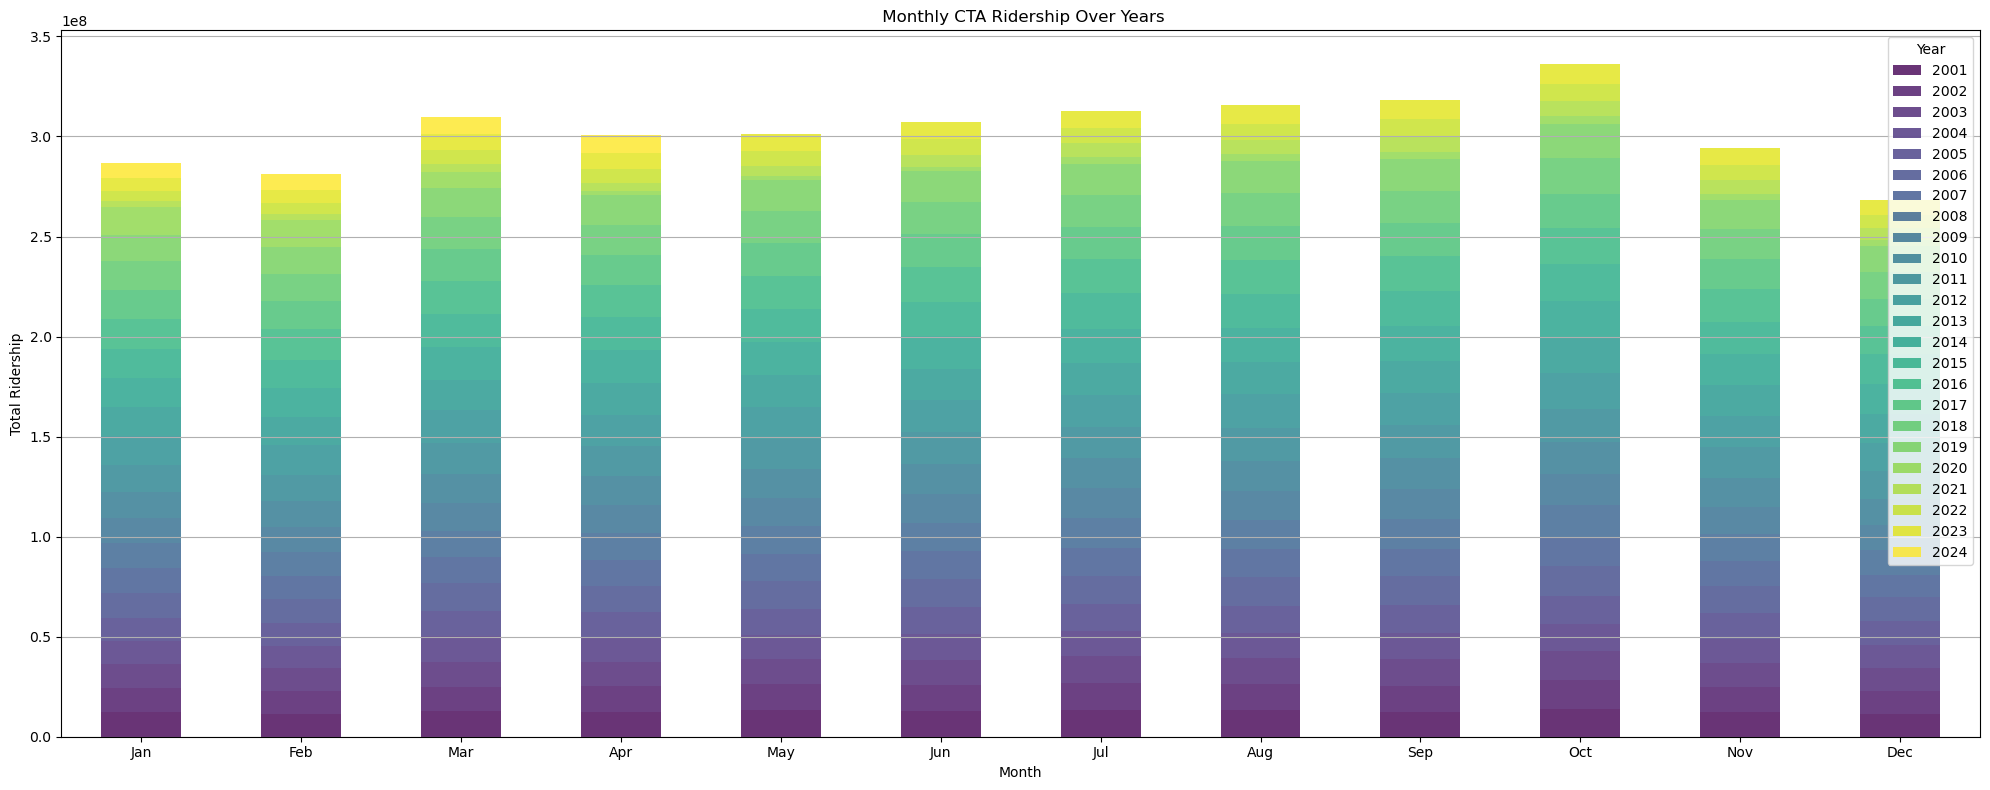

In [57]:
#Bar Chart of Monthly CTA Ridership Over Years
ridership_pivot.plot(kind='bar', stacked=True, figsize=(20, 8), colormap='viridis', alpha=0.8)
plt.title(' Monthly CTA Ridership Over Years')
plt.xlabel('Month')
plt.ylabel('Total Ridership')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0)
plt.legend(title='Year')
plt.grid(True, axis='y')
plt.tight_layout()
plt.savefig('Monthly CTA Ridership Over Years')
plt.show()

In [58]:
# Sort the data by 'monthtotal' to find the busiest months
busiest_months = monthly_ridership.sort_values(by='monthtotal', ascending=False)

#print top 5 busiest month
print(busiest_months.head())

     year  month  monthtotal
177  2015     10    18632339
165  2014     10    18411645
174  2015      7    17977486
189  2016     10    17885645
141  2012     10    17825589


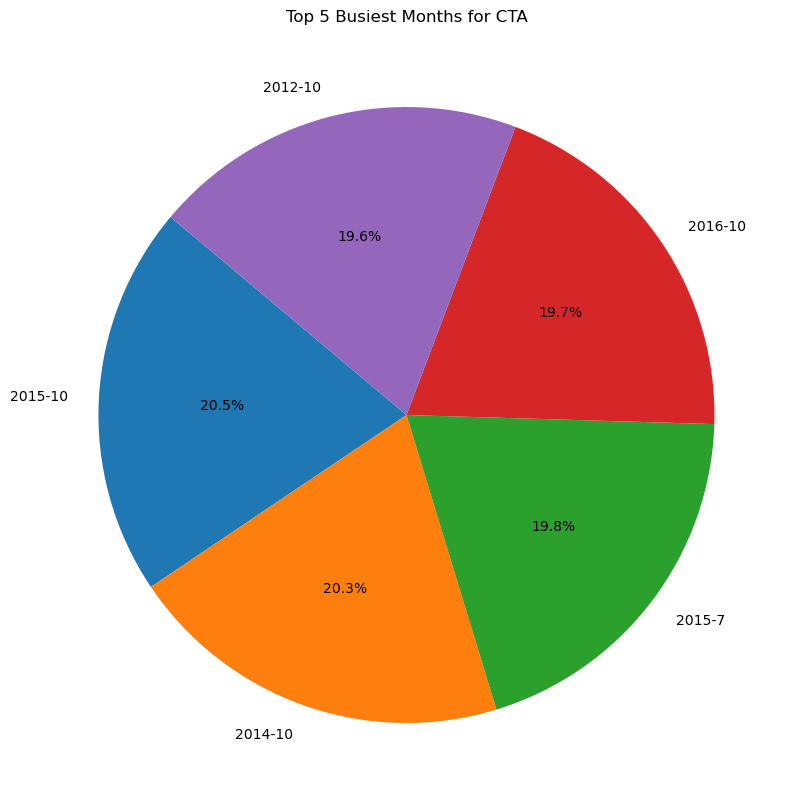

In [59]:
# Pie chart for the top 5 busiest months
top_5_busiest_months = busiest_months.head(5)

plt.figure(figsize=(10, 10))
plt.pie(top_5_busiest_months['monthtotal'], 
        labels=top_5_busiest_months['year'].astype(str) + '-' + top_5_busiest_months['month'].astype(str), 
        autopct='%1.1f%%', startangle=140, colors=plt.cm.tab10.colors)
plt.title('Top 5 Busiest Months for CTA')
plt.savefig('Top 5 Busiest Months for CTA')
plt.show()

## show the covid-19 how effect on the CTA busiest months

In [60]:
# Before COVID-19 (2001-2019)
before_covid_df = cta_ridership_df[cta_ridership_df['year'] <= 2019]
before_covid_df


,station_id,stationame,month_beginning,avg_weekday_rides,avg_saturday_rides,avg_sunday-holiday_rides,monthtotal,year,month
0,40900,Howard,2001-01-01,6233.9,3814.5,2408.6,164447,2001,1
1,41190,Jarvis,2001-01-01,1489.1,1054.0,718.0,40567,2001,1
2,40100,Morse,2001-01-01,4412.5,3064.5,2087.8,119772,2001,1
3,41300,Loyola,2001-01-01,4664.5,3156.0,1952.8,125008,2001,1
4,40760,Granville,2001-01-01,3109.8,2126.0,1453.8,84189,2001,1
...,...,...,...,...,...,...,...,...,...
32468,40850,Library,2019-12-01,2894.6,1253.5,792.7,70556,2019,12
32469,40680,Adams/Wabash,2019-12-01,5498.6,2258.8,1460.5,133268,2019,12
32470,41700,Washington/Wabash,2019-12-01,9848.1,5374.5,3535.5,249522,2019,12
32471,40260,State/Lake,2019-12-01,10751.6,5683.5,3810.5,271380,2019,12


In [61]:
# After COVID-19 (2020-2024)
after_covid_df = cta_ridership_df[cta_ridership_df['year'] >= 2020]
after_covid_df

,station_id,stationame,month_beginning,avg_weekday_rides,avg_saturday_rides,avg_sunday-holiday_rides,monthtotal,year,month
32473,40900,Howard,2020-01-01,4801.2,2852.0,2304.4,128557,2020,1
32474,41190,Jarvis,2020-01-01,1359.3,1027.5,811.4,38071,2020,1
32475,40100,Morse,2020-01-01,4119.4,2628.0,2091.8,111598,2020,1
32476,41300,Loyola,2020-01-01,4869.3,3517.0,2590.0,134143,2020,1
32477,40760,Granville,2020-01-01,3533.1,1619.8,1392.4,91169,2020,1
...,...,...,...,...,...,...,...,...,...
39906,40850,Library,2024-04-01,2679.9,1587.5,1051.8,69514,2024,4
39907,40680,Adams/Wabash,2024-04-01,4630.2,2207.8,1587.5,117045,2024,4
39908,41700,Washington/Wabash,2024-04-01,6461.8,4471.8,3060.8,172289,2024,4
39909,40260,State/Lake,2024-04-01,7407.8,5738.8,4181.5,202653,2024,4


In [79]:
 #Group and sum the data by month before COVID-19
monthly_totals_before_covid = before_covid_df.groupby('month')['monthtotal'].sum()

# Sort and find the top 5 busiest months
top_5_busiest_months_before_covid = monthly_totals_before_covid.sort_values(ascending=False).head(5)
print("Top 5 Busiest Months Before COVID-19:")
print(top_5_busiest_months_before_covid)

Top 5 Busiest Months Before COVID-19:
month
10    306109385
9     288628627
8     287748022
7     286199367
6     282518609
Name: monthtotal, dtype: int64


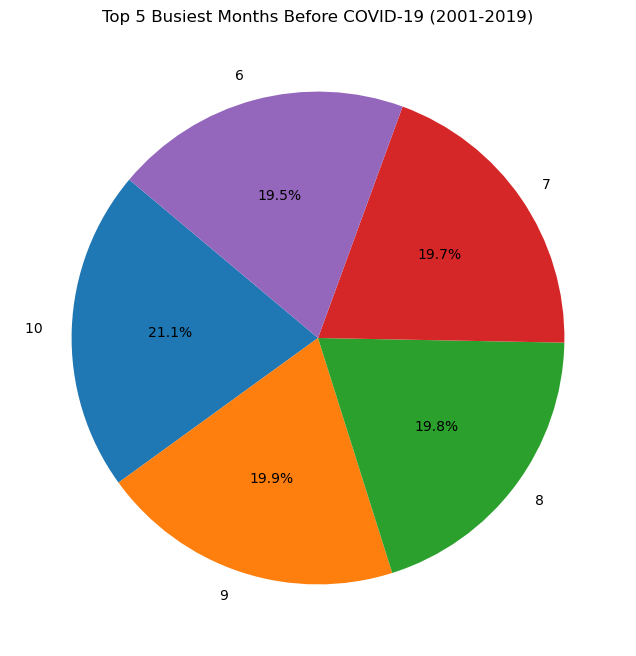

In [80]:
plt.figure(figsize=(8, 8))
plt.pie(top_5_busiest_months_before_covid, labels=[f'{month} ' for month, total in top_5_busiest_months_before_covid.items()],
        startangle=140, autopct='%1.1f%%')
plt.title('Top 5 Busiest Months Before COVID-19 (2001-2019)')
plt.savefig('Top 5 Busiest Months Before COVID-19 (2001-2019)')
plt.show()

In [77]:
# Group and sum the data by month after COVID-19
monthly_totals_after_covid = after_covid_df.groupby('month')['monthtotal'].sum()

# Sort and find the top 5 busiest months
top_5_busiest_months_after_covid = monthly_totals_after_covid.sort_values(ascending=False).head(5)
print("Top 5 Busiest Months After COVID-19:")
print(top_5_busiest_months_after_covid)

Top 5 Busiest Months After COVID-19:
month
2     36437229
1     35984106
3     35514107
10    30122650
4     29600373
Name: monthtotal, dtype: int64


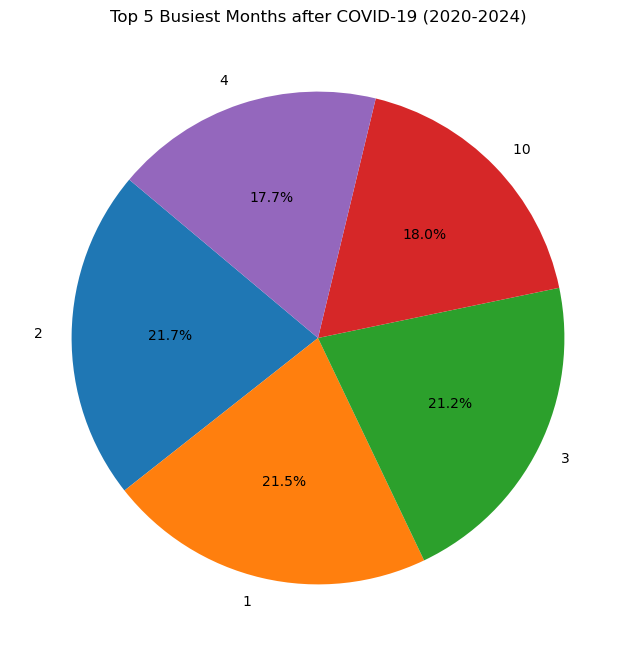

In [78]:
plt.figure(figsize=(8, 8))
plt.pie(top_5_busiest_months_after_covid, labels=[f'{month} ' for month, total in top_5_busiest_months_after_covid.items()],
        startangle=140, autopct='%1.1f%%')
plt.title('Top 5 Busiest Months after COVID-19 (2020-2024)')
plt.savefig('Top 5 Busiest Months Before COVID-19 (2020-2024)')
plt.show()

## STATISTICAL ANALYSIS (BEFOE AND AFTER COVID-19)

In [70]:
# Before COVID-19
mean_before_covid = top_5_busiest_months_before_covid.mean()
median_before_covid = top_5_busiest_months_before_covid.median()
std_dev_before_covid = top_5_busiest_months_before_covid.std()

# After COVID-19
mean_after_covid = top_5_busiest_months_after_covid.mean()
median_after_covid = top_5_busiest_months_after_covid.median()
std_dev_after_covid = top_5_busiest_months_after_covid.std()

print("Before COVID-19 - Top 5 Busiest Months:")
print(f"Mean: {mean_before_covid:.2f}, Median: {median_before_covid:.2f}, Standard Deviation: {std_dev_before_covid:.2f}")

print("\nAfter COVID-19 - Top 5 Busiest Months:")
print(f"Mean: {mean_after_covid:.2f}, Median: {median_after_covid:.2f}, Standard Deviation: {std_dev_after_covid:.2f}")

Before COVID-19 - Top 5 Busiest Months:
Mean: 290240802.00, Median: 287748022.00, Standard Deviation: 9173200.76

After COVID-19 - Top 5 Busiest Months:
Mean: 33531693.00, Median: 35514107.00, Standard Deviation: 3371323.38


In [72]:
mean_diff_covid = mean_after_covid - mean_before_covid
std_dev_diff_covid = std_dev_after_covid - std_dev_before_covid

print(f"\nDifference in Mean: {mean_diff_covid:.2f}")
print(f"Difference in Standard Deviation: {std_dev_diff_covid:.2f}")


Difference in Mean: -256709109.00
Difference in Standard Deviation: -5801877.37
